In [1]:
from tensorflow.keras.models import load_model

classifier = load_model('CNN_bike_car_model.h5')

- Xây dựng hàm xử lý và dự đoán hình ảnh từ model đã huấn luyện:

In [2]:
def cnn_predict_img(model, path_img, target_size, class_0, class_1):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    from tensorflow.keras.models import load_model
    from tensorflow.keras.preprocessing import image
    model_clf = load_model(model)
    test_img = image.load_img(path_img, target_size = target_size)
    test_img = image.img_to_array(test_img)
    test_img /= 255
    test_img = np.expand_dims(test_img, axis = 0)
    
    result = model_clf.predict(test_img)
    if result[0][0] > 0.5:
        print('{}: {}'.format(class_1, result[0][0]))
    else:
        print(class_0)
    img = mpimg.imread(path_img)
    plt.imshow(img)
    plt.show()

- Xây dựng hàm đọc tên file hình ảnh từ folder hình ảnh dùng để mô hình dự đoán:

In [3]:
import os

def load_dataset(folder_name):
    my_dir = os.getcwd() + '/' + folder_name
    file_names = []
    for entry_name in os.listdir(my_dir):
        entry_path = os.path.join(my_dir, entry_name)
        file_names.append(entry_path)
    return file_names

- Dự đoán hình ảnh:

car: 0.9999996423721313


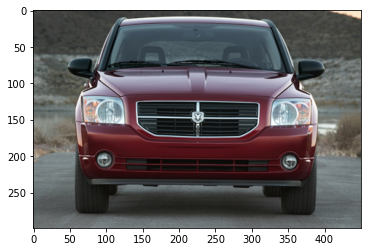

car: 0.9997073411941528


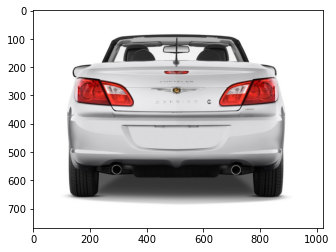

bike


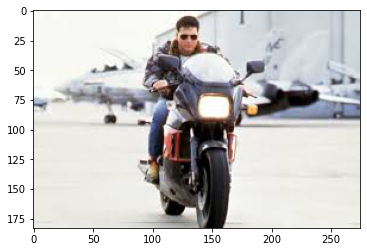

bike


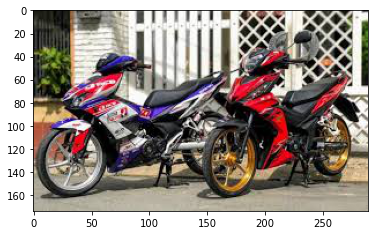

car: 1.0


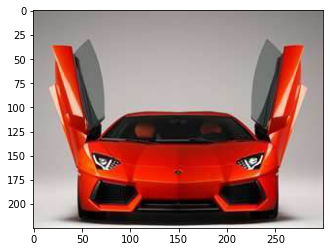

bike


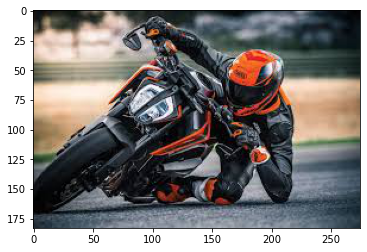

bike


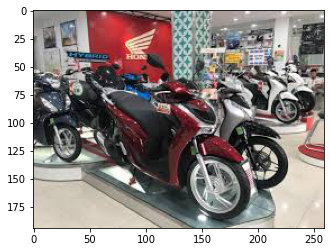

car: 1.0


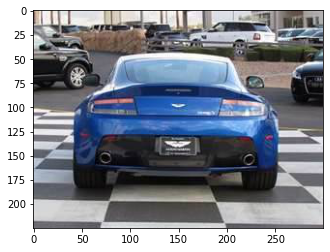

bike


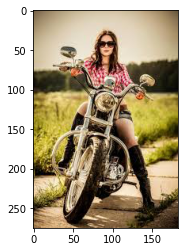

car: 0.9962354898452759


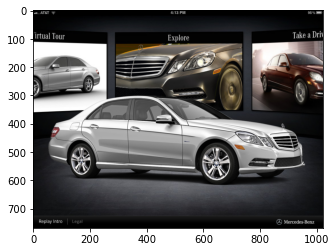

In [5]:
folder_name = 'predict'

img_predict = load_dataset(folder_name)

for img in img_predict:
    cnn_predict_img('CNN_bike_car_model.h5', img, (128, 128), 'bike', 'car')